In [176]:
#dependancies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [177]:
#files and reading said files
mouse_drug_data = "Data/mouse_drug_data.csv"
clinical_trial_data = "Data/clinical_trial_data.csv"

mousedf = pd.read_csv(mouse_drug_data)
mousedf.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [178]:
clinicaldf = pd.read_csv(clinical_trial_data)

In [179]:
#Duplicate Mouse IDs
mergeddf = pd.merge(mousedf, clinicaldf, on="Mouse ID",how='outer')
mergeddf_sorted = mergeddf.sort_values(["Tumor Volume (mm3)"], ascending =True)
mergeddf_sorted.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1


In [180]:
number_mice = mergeddf_sorted["Mouse ID"].nunique()
number_mice

249

In [181]:
dup_mice_ID = mergeddf_sorted.loc[mergeddf_sorted.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [182]:
#getand clean all duplicate mice data
dup_mice_df = mergeddf_sorted.loc[mergeddf_sorted["Mouse ID"] == "g989", :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
908,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
910,g989,Propriva,Female,21,26,5,48.786801,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
912,g989,Propriva,Female,21,26,10,51.745156,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1
916,g989,Propriva,Female,21,26,20,55.326122,1


In [183]:
cleaned_df = mergeddf_sorted[mergeddf_sorted["Mouse ID"].isin(dup_mice_ID)==False]
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
7,k403,Ramicane,Male,21,16,35,26.546993,1


In [184]:
#check mouse number 
check_mice = cleaned_df["Mouse ID"].nunique()    
check_mice

248

In [185]:
# mean median variance, std, SEM
mean = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).mean()
median = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).median()
variance = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).var()
std = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).std()
sem = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).sem()

summary_list = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":variance, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})

summary_list

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [186]:
#aggregate on line
aggregate_sum =  cleaned_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregate_sum

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [187]:
#bar and pie charts
per_drug_count = cleaned_df["Drug Regimen"].value_counts()
per_drug_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

#bar chart
plot_pandas = drug_count.plot.bar(color='c')  

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

Text(0.5, 1.0, '# of Mice/Treatment')

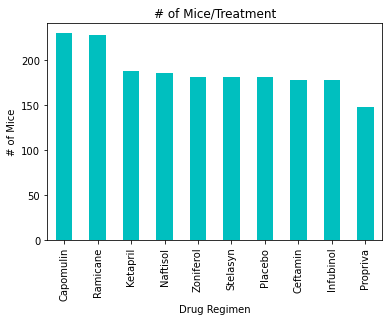

In [188]:
# bar chart
plot_pandas = per_drug_count.plot.bar(color='c')  
# label axis
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")
plt.title("# of Mice/Treatment")

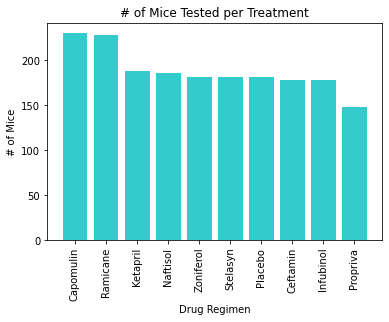

In [189]:
# bar plot pyplot.
x_axis = per_drug_count.index.values
y_axis = per_drug_count.values

plt.bar(x_axis, y_axis, color='c', alpha=0.8, align='center')

# LABEL TITLE FORMATTING
plt.title("# of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Mice")
plt.xticks(rotation="vertical")
plt.show()

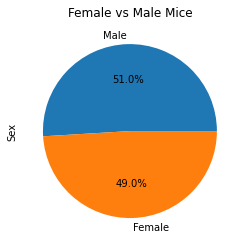

In [190]:
# pie plot
gender_data_difference = cleaned_df["Sex"].value_counts()

plt.title("Female vs Male Mice")

gender_data_difference.plot.pie(autopct= "%1.1f%%")

plt.show()

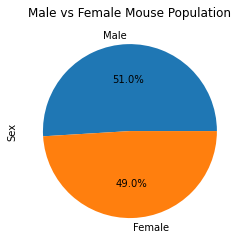

In [191]:
#pie plot pyplot
#labels
labels = ['Female', 'Male']

sizes = [49.79, 50.21]

plot = gender_data_difference.plot.pie(y='Total Count', autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population')

plt.ylabel('Sex')

plt.show()

In [192]:
# Quartiles, Outliers and Boxplots
# final tumor vol per drug
Capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ceftamin", :]

In [193]:
# greatest timepoijnt per mouse 
Ceftamin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [194]:
#Ceftamin

Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles =Ceftamin_tumors.quantile([.25,.5,.75])

lowerq = quartiles[0.25]

upperq = quartiles[0.75]

iqr = upperq-lowerq


print(f"The lower quartile of Ceftamin tumors: {lowerq}")
print(f"The upper quartile of Ceftamin tumors: {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)

upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")

print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumors: 32.37735684
The upper quartile of Ceftamin tumors: 40.1592203
The interquartile range of Ceftamin tumors: 7.781863460000004
The median of Ceftamin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [195]:
#Infubinol
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()
Infubinol_merge.to_csv("output.csv")
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles =Infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]

upperq = quartiles[0.75]

iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors is: {lowerq}")
print(f"The upper quartile of Infubinol tumors is: {upperq}")
print(f"The interquartile range of Infubinol tumors is: {iqr}")
print(f"The median of Infubinol tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)

upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")

print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors is: 54.04860769
The upper quartile of Infubinol tumors is: 65.52574285
The interquartile range of Infubinol tumors is: 11.477135160000003
The median of Infubinol tumors is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [196]:
#Ramicane
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("output.csv")
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]

upperq = quartiles[0.75]

iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)

upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")

print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [197]:
#Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, cleaned_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()
Capomulin_merge.to_csv("output.csv")
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]

upperq = quartiles[0.75]

iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors is: {lowerq}")
print(f"The upper quartile of Capomulin tumors is: {upperq}")
print(f"The interquartile range of Capomulin tumors is: {iqr}")
print(f"The median of Capomulin tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)

upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")

print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors is: 32.37735684
The upper quartile of Capomulin tumors is: 40.1592203
The interquartile range of Capomulin tumors is: 7.781863460000004
The median of Capomulin tumors is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


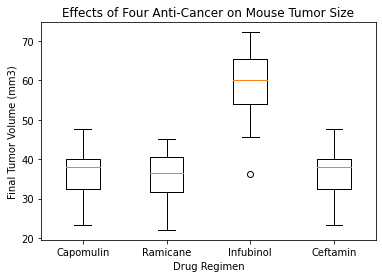

In [198]:
# box plots axis' and labels
data_to_plot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]

Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots()

ax1.set_title('Effects of Four Anti-Cancer on Mouse Tumor Size')

ax1.set_ylabel('Final Tumor Volume (mm3)')

ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, vert=True)

plt.show()

In [199]:
# Final tumor vol
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = mergeddf[mergeddf["Drug Regimen"].isin(drug_list)]
drugs.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [200]:
# great timepoint per mouse
big_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#df manipulation
big_timepoint = big_timepoint.stack(level=0).unstack(level=0)
for drug in drug_list:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [201]:
# treatments, empty list
#IQR  calc, outliers
treatment = 0
for drug in drug_list:
    quartiles = big_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)


    if treatment == 0:
        print(f"----------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The IQR of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} are {drug} outliers.")
    print(f"Values above {upper_bound} are {drug} outliers.")
    print(f"----------------------")
    treatment+=1

----------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The IQR of Capomulin treatments is: 7.78
Values below 20.71 are Capomulin outliers.
Values above 51.83 are Capomulin outliers.
----------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The IQR of Ramicane treatments is: 9.1
Values below 17.91 are Ramicane outliers.
Values above 54.31 are Ramicane outliers.
----------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The IQR of Infubinol treatments is: 11.48
Values below 36.83 are Infubinol outliers.
Values above 82.75 are Infubinol outliers.
----------------------
The lower quartile of Ceftamin treatments is: 48.72
The upper quartile of Ceftamin treatments is: 64.3
The IQR of Ceftamin treatments is: 15.58
Values below 25.35 are Ceftamin outliers.
Values above 87.67 are Cefta

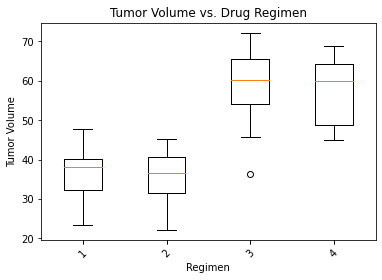

In [202]:
#finaltumor vol box plot 
boxplot_list = []

for drug in drug_list:
    boxplot_list.append(list(big_timepoint[drug].dropna()))
    
fig = plt.figure()

plt.xlabel("Regimen")

plt.xticks([1,2,3,4], drug_list, rotation=45)

plt.ylabel("Tumor Volume")

plt.title("Tumor Volume vs. Drug Regimen")

plt.boxplot(boxplot_list)

plt.show()

Text(0, 0.5, 'Tumor Volume (mm3)')

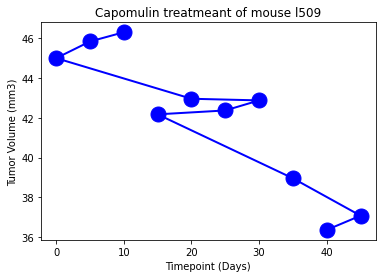

In [203]:
# line plot Tumor Vol vs. Time point for Capomulin

forline_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "g288",:]

forline_df.head()

x_axis = forline_df["Timepoint"]

tumsiz = forline_df["Tumor Volume (mm3)"]


fig1, ax1 = plt.subplots()

plt.title('Capomulin treatmeant of mouse l509')

plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")

plt.xlabel('Timepoint (Days)')

plt.ylabel('Tumor Volume (mm3)')


Text(0, 0.5, 'Avg Tumor Volume (mm3)')

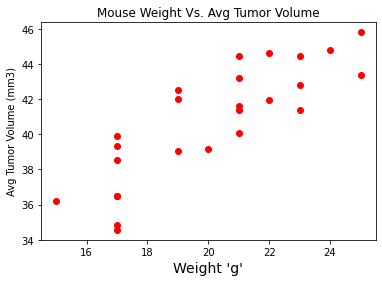

In [208]:
#scatter plot avg tumorm vol vs mouse weight (Capomulin)
fig1, ax1 = plt.subplots()

capo_tumor_vol = Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15

plt.scatter(capo_tumor_vol['Weight (g)'],capo_tumor_vol['Tumor Volume (mm3)'], color="red")

plt.title('Mouse Weight Vs. Avg Tumor Volume')

plt.xlabel("Weight 'g'",fontsize =14)

plt.ylabel('Avg Tumor Volume (mm3)')

In [209]:
# THE  CORRELATION

correlation = st.pearsonr(capo_tumor_vol["Weight (g)"],capo_tumor_vol['Tumor Volume (mm3)'])[0],2

print(f"The correlation between mouse weight and avg tumor volume is {correlation}")

The correlation between mouse weight and avg tumor volume is (0.8419363424694724, 2)


The r^2 is: 0.709


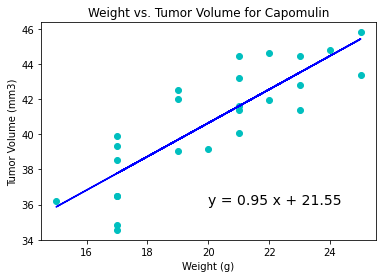

In [214]:
#regression

(slope, intercept,rvalue, pvalue, stderr)= linregress(capo_tumor_vol["Weight (g)"],capo_tumor_vol["Tumor Volume (mm3)"])
regress_values=capo_tumor_vol["Weight (g)"]* slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(capo_tumor_vol["Weight (g)"],capo_tumor_vol["Tumor Volume (mm3)"],color='c')

plt.plot(capo_tumor_vol["Weight (g)"], regress_values, color='blue')

plt.annotate(line_eq,(20,36), fontsize=14)

plt.xlabel("Weight (g)")

plt.ylabel("Tumor Volume (mm3)")

plt.title("Weight vs. Tumor Volume for Capomulin")

print(f"The r^2 is: {round(rvalue**2,3)}")

plt.show()